# Brunnen in der Stadt Zürich - Water fountains in Zürich

## About

- **Purpose**: data preparation for Tableau; clean and prepare data, select columns of interest and write the final data frame(s) to GeoJSON file(s), to be used as data source in Tableau
- **Subject**: information on water fountains in Zürich, including fountains of the water supply and other service departments of the city of Zürich, as well as private fountains.
- **Data sources**:
    - Fountain locations: [Stadt Zürich - Brunnen](https://www.stadt-zuerich.ch/geodaten/download/Brunnen?format=10008) (GeoJSON)
    - Data dictionary: [geocat.ch](https://www.geocat.ch/geonetwork/srv/ger/catalog.search#/metadata/876cc251-9064-437a-94c6-5551318a1cd3/formatters/xsl-view?root=div&view=advanced)
    - District (Stadtkreis) geodata: [Stadt Zürich - Stadtkreise](https://www.stadt-zuerich.ch/geodaten/download/Stadtkreise?format=10009) (GeoJSON)
- **Licence**: The datasets are made available under the [Creative-Commons_Zero-Lizenz(CC-0)](https://www.stadt-zuerich.ch/geodaten/download/Brunnen?format=10008)

Inspired by [#MakeoverMonday 2023/W31: Milan Drinking Fountains](https://data.world/makeovermonday/2023w31/)

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
pd.set_option("max_columns", 50)

## Dataset 1: Fountain locations

### Read file and explore the dataset

In [2]:
# read geojson and create data frame
brunnen_df = gpd.read_file('https://www.ogd.stadt-zuerich.ch/wfs/geoportal/Brunnen?service=WFS&version=1.1.0&request=GetFeature&outputFormat=GeoJSON&typename=wvz_brunnen')

#### First look

In [3]:
# number of rows and columns
brunnen_df.shape

(1280, 32)

In [4]:
# first 5 rows
brunnen_df.head()

,id,abgestellt,architekt_bildhauer,art,art_eigentuemer,baujahr,bemerkung1,bemerkung2,brunnenart,brunnennummer,datum_abstellung,datum_aenderung,datum_wiederinbetriebnahme,druckzone,eigentuemer,foto,grund_abstellung,historisches_baujahr,hkoord,material_figur,material_saeule,material_trog,objectid,ortsbezeichnung,quartier,stadtkreis,standort,steinhauer,u_aks_nummer,vkoord,wasserart,geometry
0,wvz_brunnen.1,nein,None,Notwasserbrunnen,öffentlich,1985.0,None,None,Notwasserbrunnen,6061,NaT,202212052235,None,Brunnennetz,WVZ,https://wvzm0gib.global.szh.loc/Brunnenbilder/...,None,1986.0,2685636.345,None,None,Bronzeguss,1.0,None,Schwamendingen,12,Stettbachweg-/Winterthurerstrasse,None,{AC762A2C-760A-489A-9F28-68B0196B799E},1250981.102,Quellwasser,POINT (8.57317 47.40408)
1,wvz_brunnen.2,nein,None,Notwasserbrunnen,öffentlich,1981.0,None,None,Notwasserbrunnen,6046,NaT,202212052235,None,Brunnennetz,WVZ,https://wvzm0gib.global.szh.loc/Brunnenbilder/...,None,1983.0,2685567.159,None,None,Bronzeguss,2.0,None,Schwamendingen,12,Aubrugg-/Ueberlandstrasse,None,{0A531BDE-1B43-45CA-BEBB-D1707FB59C4A},1251726.383,Quellwasser,POINT (8.57239 47.41079)
2,wvz_brunnen.3,nein,None,Notwasserbrunnen,öffentlich,1982.0,None,None,Notwasserbrunnen,6053,NaT,202212052235,None,Brunnennetz,WVZ,https://wvzm0gib.global.szh.loc/Brunnenbilder/...,None,1985.0,2686489.351,None,None,Bronzeguss,3.0,None,Schwamendingen,12,Dübendorf-/Eichackerstrasse,None,{44A258C7-A2CA-48B4-AE61-26AFD105C9B3},1250617.263,Quellwasser,POINT (8.58440 47.40070)
3,wvz_brunnen.4,nein,None,Notwasserbrunnen,öffentlich,1978.0,None,None,Notwasserbrunnen,6018,NaT,202212052235,None,Brunnennetz,WVZ,https://wvzm0gib.global.szh.loc/Brunnenbilder/...,None,1978.0,2685327.613,None,None,Bronzeguss,4.0,None,Schwamendingen,12,Friedrich-/Saatlenstrasse,None,{ACCB570A-F62D-4207-904B-F317B4BCA47A},1251157.765,Quellwasser,POINT (8.56911 47.40571)
4,wvz_brunnen.5,nein,None,Notwasserbrunnen,öffentlich,1978.0,None,None,Notwasserbrunnen,6055,NaT,202212052235,None,Brunnennetz,WVZ,https://wvzm0gib.global.szh.loc/Brunnenbilder/...,None,1985.0,2683697.522,None,None,Bronzeguss,5.0,None,Affoltern/Oerlikon/Seebach,11,Hirschwiesenstr./b. Hirschgartnerweg 36,None,{1ED203DC-76EA-4AB5-B9B9-4E3709A4226F},1250547.185,Quellwasser,POINT (8.54740 47.40043)


In [5]:
# columns, data types
brunnen_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1280 entries, 0 to 1279
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          1280 non-null   object        
 1   abgestellt                  1280 non-null   object        
 2   architekt_bildhauer         432 non-null    object        
 3   art                         1280 non-null   object        
 4   art_eigentuemer             1278 non-null   object        
 5   baujahr                     868 non-null    float64       
 6   bemerkung1                  115 non-null    object        
 7   bemerkung2                  17 non-null     object        
 8   brunnenart                  749 non-null    object        
 9   brunnennummer               1280 non-null   object        
 10  datum_abstellung            13 non-null     datetime64[ns]
 11  datum_aenderung             1280 non-null   obje

<AxesSubplot:>

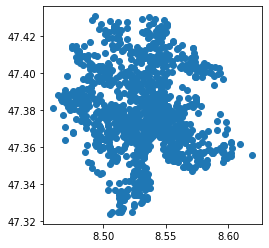

In [6]:
# plot geometry
brunnen_df.plot()

The dataset contains information on 1280 different water fountains, including location, year built, material, link to photo etc. I don't need all the information for my visualization, so I'm going to explore some columns in more detail and decide which ones to use.

#### Find columns of interest

In [7]:
# see all columns
brunnen_df.columns

Index(['id', 'abgestellt', 'architekt_bildhauer', 'art', 'art_eigentuemer',
       'baujahr', 'bemerkung1', 'bemerkung2', 'brunnenart', 'brunnennummer',
       'datum_abstellung', 'datum_aenderung', 'datum_wiederinbetriebnahme',
       'druckzone', 'eigentuemer', 'foto', 'grund_abstellung',
       'historisches_baujahr', 'hkoord', 'material_figur', 'material_saeule',
       'material_trog', 'objectid', 'ortsbezeichnung', 'quartier',
       'stadtkreis', 'standort', 'steinhauer', 'u_aks_nummer', 'vkoord',
       'wasserart', 'geometry'],
      dtype='object')

#### Check duplicates in the id column

In [8]:
# any duplicates in the id column?
brunnen_df[brunnen_df.id.duplicated()]

,id,abgestellt,architekt_bildhauer,art,art_eigentuemer,baujahr,bemerkung1,bemerkung2,brunnenart,brunnennummer,datum_abstellung,datum_aenderung,datum_wiederinbetriebnahme,druckzone,eigentuemer,foto,grund_abstellung,historisches_baujahr,hkoord,material_figur,material_saeule,material_trog,objectid,ortsbezeichnung,quartier,stadtkreis,standort,steinhauer,u_aks_nummer,vkoord,wasserart,geometry


No duplicates in the dataset.

#### Categories in certain columns
- What is the difference between "art" and "brunnenart"? 
- Which one is more useful for the purpose of the visualization?

In [9]:
# see the different categories in 'art' and count the number of fountains in each
brunnen_df[["art", "id"]].groupby(["art"]).count()

,id
art,
Notwasserbrunnen,88
privat,233
öffentlich,959


In [10]:
# same as above for 'brunnenart'
brunnen_df[["brunnenart", "id"]].groupby(["brunnenart"]).count()

,id
brunnenart,
Brunnen des Verschönerungsvereins,43
Brunnen in städtischer Liegenschaft,399
Notwasserbrunnen,87
privater Brunnen,220


The categories in the "art" column seem more useful. I will probably use only the public ("öffentlich") fountains, but I keep all for now. I will use English aliases in Tableau.

In [11]:
# see the differenct materials
brunnen_df[["id","material_trog"]].groupby(["material_trog"]).count().sort_values("id", ascending = False)

,id
material_trog,
Granit,121
Bronzeguss,79
Beton,76
Kunststein,41
Kalkstein,37
...,...
"Iragnagranit, hell",1
"Iragnagranit, hell (Modell Schäfer)",1
Istrischer Kalkstein,1


Too many categories, not particularly interesting, not going to use it.

In [12]:
# water type? what does it mean?
brunnen_df[["id","wasserart"]].groupby(["wasserart"]).count().sort_values("id", ascending = False)

,id
wasserart,
Züriwasser,813
Quellwasser,432
eigene Versorgung,31
Grundwasser,4


Probably source of water, could be interesting. (Verteilnetz, Quellwasser oder anderes = Distribution network, spring water or other)

In [13]:
# see location by quartier
brunnen_df[["id","quartier"]].groupby(["quartier"]).count().sort_values("id", ascending = False)

,id
quartier,
Altstadt,158
Fluntern/Hottingen/Witikon,158
Affoltern/Oerlikon/Seebach,144
Enge/Wollishofen/Leimbach,144
Wiedikon,119
Altstetten/Albisrieden,116
Hoengg/Wipkingen,112
Unterstrass/Oberstrass,98
Schwamendingen,66


Could be useful to use this with quartier geodata, but the names here are different than the names used in the [Quartierteams](https://www.stadt-zuerich.ch/geodaten/download/Quartierteams) dataset.

In [14]:
# see location by district = Kreis
brunnen_df[["id","stadtkreis"]].groupby(["stadtkreis"]).count().sort_values("id", ascending = False)

,id
stadtkreis,
1,158
7,158
2,146
11,143
3,119
9,118
10,112
6,99
12,66


There is a dataset for [Stadtkreise](https://www.stadt-zuerich.ch/geodaten/download/Stadtkreise?format=10009) can be used together with this data. (Join on Stadtkreis number.) This dataset contains polygon geometry for the differenct city districts.

### Create new data frame from selected columns

In [15]:
# create filtered data frame
brunnen_extract = brunnen_df[["id", "art", "baujahr", "eigentuemer", "quartier", "stadtkreis", "standort", "wasserart", "geometry"]]

In [16]:
# rename columns using English names
brunnen_extract = brunnen_extract.rename(columns = {"id" : "ID", 
                                             "art": "type",
                                             "baujahr" : "year_built",
                                             "eigentuemer" : "owner",
                                             "quartier" : "quartier",
                                             "stadtkreis" : "district_no",
                                             "standort" : "location",
                                             "wasserart" : "water_type",
                                             "geometry" : "geometry"
                                            })

In [17]:
# check the new dataset
brunnen_extract.head()

,ID,type,year_built,owner,quartier,district_no,location,water_type,geometry
0,wvz_brunnen.1,Notwasserbrunnen,1985.0,WVZ,Schwamendingen,12,Stettbachweg-/Winterthurerstrasse,Quellwasser,POINT (8.57317 47.40408)
1,wvz_brunnen.2,Notwasserbrunnen,1981.0,WVZ,Schwamendingen,12,Aubrugg-/Ueberlandstrasse,Quellwasser,POINT (8.57239 47.41079)
2,wvz_brunnen.3,Notwasserbrunnen,1982.0,WVZ,Schwamendingen,12,Dübendorf-/Eichackerstrasse,Quellwasser,POINT (8.58440 47.40070)
3,wvz_brunnen.4,Notwasserbrunnen,1978.0,WVZ,Schwamendingen,12,Friedrich-/Saatlenstrasse,Quellwasser,POINT (8.56911 47.40571)
4,wvz_brunnen.5,Notwasserbrunnen,1978.0,WVZ,Affoltern/Oerlikon/Seebach,11,Hirschwiesenstr./b. Hirschgartnerweg 36,Quellwasser,POINT (8.54740 47.40043)


#### Get latitude and longitude from geometry and add new columns

In [18]:
brunnen_extract["longitude"] = brunnen_extract["geometry"].x
brunnen_extract["latitude"] = brunnen_extract["geometry"].y

In [19]:
brunnen_extract.head()

,ID,type,year_built,owner,quartier,district_no,location,water_type,geometry,longitude,latitude
0,wvz_brunnen.1,Notwasserbrunnen,1985.0,WVZ,Schwamendingen,12,Stettbachweg-/Winterthurerstrasse,Quellwasser,POINT (8.57317 47.40408),8.573166,47.404080
1,wvz_brunnen.2,Notwasserbrunnen,1981.0,WVZ,Schwamendingen,12,Aubrugg-/Ueberlandstrasse,Quellwasser,POINT (8.57239 47.41079),8.572392,47.410791
2,wvz_brunnen.3,Notwasserbrunnen,1982.0,WVZ,Schwamendingen,12,Dübendorf-/Eichackerstrasse,Quellwasser,POINT (8.58440 47.40070),8.584395,47.400696
3,wvz_brunnen.4,Notwasserbrunnen,1978.0,WVZ,Schwamendingen,12,Friedrich-/Saatlenstrasse,Quellwasser,POINT (8.56911 47.40571),8.569110,47.405709
4,wvz_brunnen.5,Notwasserbrunnen,1978.0,WVZ,Affoltern/Oerlikon/Seebach,11,Hirschwiesenstr./b. Hirschgartnerweg 36,Quellwasser,POINT (8.54740 47.40043),8.547402,47.400427


(Might not need it because Tableau can use the geometry to generate coordinates.)

In [20]:
brunnen_extract.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1280 entries, 0 to 1279
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   ID           1280 non-null   object  
 1   type         1280 non-null   object  
 2   year_built   868 non-null    float64 
 3   owner        1277 non-null   object  
 4   quartier     1273 non-null   object  
 5   district_no  1276 non-null   object  
 6   location     1276 non-null   object  
 7   water_type   1280 non-null   object  
 8   geometry     1280 non-null   geometry
 9   longitude    1280 non-null   float64 
 10  latitude     1280 non-null   float64 
dtypes: float64(3), geometry(1), object(7)
memory usage: 110.1+ KB


## Dataset 2: District geo data

### Read file and check dataset

In [21]:
kreis_df = gpd.read_file("https://www.ogd.stadt-zuerich.ch/wfs/geoportal/Stadtkreise?service=WFS&version=1.1.0&request=GetFeature&outputFormat=GeoJSON&typename=adm_stadtkreise_v")

In [22]:
kreis_df

,id,kname,knr,objid,geometry
0,adm_stadtkreise_v.1,Kreis 6,6,1,"POLYGON ((8.52602 47.40844, 8.52625 47.40855, ..."
1,adm_stadtkreise_v.10,Kreis 11,11,10,"POLYGON ((8.48438 47.42903, 8.48439 47.42909, ..."
2,adm_stadtkreise_v.11,Kreis 12,12,11,"POLYGON ((8.55353 47.39929, 8.55358 47.39935, ..."
3,adm_stadtkreise_v.12,Kreis 10,10,12,"POLYGON ((8.46802 47.41334, 8.46803 47.41334, ..."
4,adm_stadtkreise_v.2,Kreis 4,4,2,"POLYGON ((8.49762 47.38834, 8.49789 47.38876, ..."
5,adm_stadtkreise_v.3,Kreis 1,1,3,"POLYGON ((8.52922 47.36921, 8.52957 47.36944, ..."
6,adm_stadtkreise_v.4,Kreis 9,9,4,"POLYGON ((8.44802 47.38025, 8.44856 47.38027, ..."
7,adm_stadtkreise_v.5,Kreis 5,5,5,"POLYGON ((8.49837 47.39205, 8.49899 47.39205, ..."
8,adm_stadtkreise_v.6,Kreis 7,7,6,"POLYGON ((8.54866 47.37709, 8.54866 47.37709, ..."
9,adm_stadtkreise_v.7,Kreis 3,3,7,"POLYGON ((8.48343 47.35802, 8.48355 47.35820, ..."


In [23]:
kreis_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   id        12 non-null     object  
 1   kname     12 non-null     object  
 2   knr       12 non-null     int64   
 3   objid     12 non-null     object  
 4   geometry  12 non-null     geometry
dtypes: geometry(1), int64(1), object(3)
memory usage: 608.0+ bytes


<AxesSubplot:>

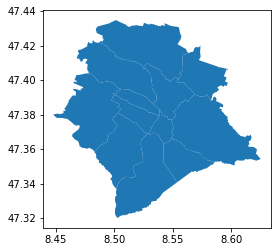

In [24]:
kreis_df.plot()

Name and coordinates for the 12 city districts.

### Create dataframe from selected columns

In [25]:
kreis_extract = kreis_df[["kname", "knr", "geometry"]]

In [26]:
kreis_extract = kreis_extract.rename(columns = {"kname" : "district_name", "knr" : "district_no", "geometry" : "geometry"})
kreis_extract

,district_name,district_no,geometry
0,Kreis 6,6,"POLYGON ((8.52602 47.40844, 8.52625 47.40855, ..."
1,Kreis 11,11,"POLYGON ((8.48438 47.42903, 8.48439 47.42909, ..."
2,Kreis 12,12,"POLYGON ((8.55353 47.39929, 8.55358 47.39935, ..."
3,Kreis 10,10,"POLYGON ((8.46802 47.41334, 8.46803 47.41334, ..."
4,Kreis 4,4,"POLYGON ((8.49762 47.38834, 8.49789 47.38876, ..."
5,Kreis 1,1,"POLYGON ((8.52922 47.36921, 8.52957 47.36944, ..."
6,Kreis 9,9,"POLYGON ((8.44802 47.38025, 8.44856 47.38027, ..."
7,Kreis 5,5,"POLYGON ((8.49837 47.39205, 8.49899 47.39205, ..."
8,Kreis 7,7,"POLYGON ((8.54866 47.37709, 8.54866 47.37709, ..."
9,Kreis 3,3,"POLYGON ((8.48343 47.35802, 8.48355 47.35820, ..."


## Join the the datasets on district_no

<font color = red> I wanted to merge the two data frames together, but I realized I won't be able to write the merged data frame to a GeoJSON file as there can only be one active geometry column.

I received the following error message when writing the file:
    TypeError: Cannot interpret '<geopandas.array.GeometryDtype object at 0x0000023AACAB3580>' as a data type<font>

I write the files separately and will join them in Tableau.

## Write files
Write separate GeoJSON files for each data frame.

In [27]:
# write water fountain dataset to geojson, use encoding = "utf-8" because of "ü"
brunnen_extract.to_file("Water_fountains_ZH.geojson", driver = "GeoJSON", encoding = "utf-8")

In [28]:
# write district dataset to geojson
kreis_extract.to_file("Stadtkreise_ZH.geojson", driver = "GeoJSON", encoding = "utf-8")